## Computer Vision Projects : skin detection 
#### Melika Heydari Rad 

this is an implementation of the skin detection propesed algorithm from the paper: https://arxiv.org/abs/1708.02694  
#### the proposed algorithm for finding the skin mask is as follows:  
  
0.0 <= H <= 50.0 and 0.23 <= S <= 0.68 and  
R > 95 and G > 40 and B > 20 and R > G and R > B  
and | R - G | > 15 and A > 15  
##### OR
R > 95 and G > 40 and B > 20 and R > G and R > B  
and | R - G | > 15 and A > 15 and Cr > 135 and  
Cb > 85 and Y > 80 and Cr <= (1.5862*Cb)+20 and  
Cr>=(0.3448*Cb)+76.2069 and  
Cr >= (-4.5652*Cb)+234.5652 and  
Cr <= (-1.15*Cb)+301.75 and  
Cr <= (-2.2857*Cb)+432.85nothing  
(H : Hue ; S: Saturation ; R : Red ; B: Blue ; G : Green ; Cr, Cb : Chrominance components ; Y : luminance component )

#### to implement this, we create two masks and then take the the union of them to create the final mask. 

___

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
print(cv2.__version__)
print(np.__version__)

4.8.0
1.23.4


___

In [28]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('Cris.jpeg')

# converting image to hsv and ycrcb color spaces
bgr = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

In [29]:
print(bgr.shape, hsv.shape, ycrcb.shape)

(650, 1155, 3) (650, 1155, 3) (650, 1155, 3)


___

two masks (first_mask and second_mask) should be created, and then the union of them makes the final mask. 

### 1. creating the first mask

0.0 <= H <= 50.0 and 0.23 <= S <= 0.68  
and R > 95 and G > 40 and B > 20   
and R > G and R > B  and | R - G | > 15 

In [156]:
# scaling S channel 
# 0.23 * 255 = 58.65
# 0.68 * 255 = 173.4

In [157]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [158]:
# creating hsv mask

# 0.0 <= H <= 50.0 and 0.23 <= S <= 0.68
hsv_mask = cv2.inRange(hsv, (0, 58, 0), (50,174,255)) 
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_OPEN, kernel)
hsv_mask = cv2.morphologyEx(hsv_mask, cv2.MORPH_CLOSE, kernel)

In [159]:
# creating bgr mask

# R > 95 and G > 40 and B > 20
bgr_mask_1 = cv2.inRange(bgr, (20,40,95), (255,255,255)) 
bgr_mask_1 = cv2.morphologyEx(bgr_mask_1, cv2.MORPH_OPEN, kernel)
bgr_mask_1 = cv2.morphologyEx(bgr_mask_1, cv2.MORPH_CLOSE, kernel)

# R > G and R > B and | R - G | > 15 
idx1 = bgr[:,:,2]>bgr[:,:,1]
idx2 = bgr[:,:,2]>bgr[:,:,0]
idx3 = (bgr[:,:,2]-bgr[:,:,1])>15
idx = idx1 & idx2 & idx3
bgr_mask = bgr_mask_1 & idx

In [160]:
first_mask = hsv_mask & bgr_mask

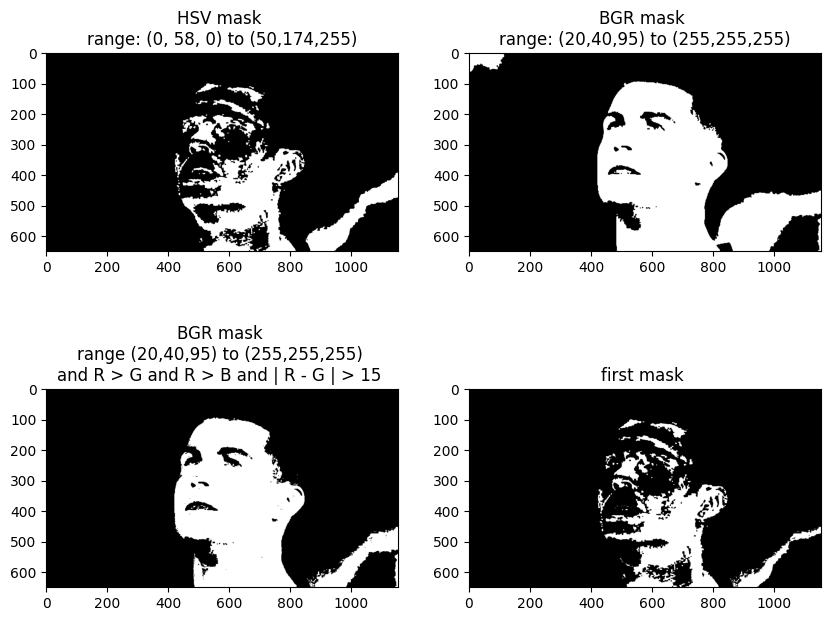

In [175]:
plt.figure(figsize = (10,8))
plt.subplot(221); plt.imshow(hsv_mask, cmap='gray'); plt.title('HSV mask \nrange: (0, 58, 0) to (50,174,255)');
plt.subplot(222); plt.imshow(bgr_mask_1, cmap='gray'); plt.title('BGR mask \nrange: (20,40,95) to (255,255,255)');
plt.subplot(223); plt.imshow(bgr_mask, cmap='gray'); plt.title('BGR mask \nrange (20,40,95) to (255,255,255) \nand R > G and R > B and | R - G | > 15 ');
plt.subplot(224); plt.imshow(first_mask, cmap='gray'); plt.title('first mask ');

### 2. creating the second mask

R > 95 and G > 40 and B > 20 and R > G and R > B  and | R - G | > 15   
and Cr > 135  and Cb > 85 and Y > 80  
and Cr <= (1.5862*Cb)+20   
and Cr>=(0.3448*Cb)+76.2069   
and Cr >= (-4.5652*Cb)+234.5652   
and Cr <= (-1.15*Cb)+301.75 and  
and Cr <= (-2.2857*Cb)+432.85nothing  